In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset

In [4]:
us_pres_df=pd.read_csv('./data/US president/1976-2020-president.csv')
us_pres_df=us_pres_df.loc[us_pres_df.year>1998].reset_index()

us_pres_df['vote_percent']=us_pres_df['candidatevotes']/us_pres_df['totalvotes']*100

us_pres_df.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,56.483755
1,2043,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,False,692611,1666272,20210113,NaN,DEMOCRAT,41.566503
2,2044,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,INDEPENDENT,False,25896,1666272,20210113,NaN,OTHER,1.554128
3,2045,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,False,5893,1666272,20210113,NaN,LIBERTARIAN,0.353664
4,2046,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,699,1666272,20210113,NaN,OTHER,0.041950


### Republican score percentage by state/year

In [5]:
republican_score=us_pres_df.loc[us_pres_df['party_simplified']=='REPUBLICAN'].copy().reset_index()
rep_year_score_df=republican_score.pivot_table(index='state_po',columns='year',values='vote_percent')

In [6]:
rep_year_score_df.head()

year,2000,2004,2008,2012,2016,2020
state_po,,,,,,
AK,58.620955,61.065330,59.424520,54.801577,51.281512,52.833143
AL,56.483755,62.460690,60.316913,60.545822,62.083092,62.031643
AR,51.307198,54.305959,58.715904,60.566936,60.574102,62.395730
AZ,51.021138,54.869434,53.635248,53.654533,48.671616,49.055981
CA,41.651497,44.357696,36.954859,37.120379,31.617107,34.320724


In [7]:
republican_score.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,0,2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,56.483755
1,5,2047,2000,ALASKA,AK,2,94,81,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,167398,285560,20210113,NaN,REPUBLICAN,58.620955
2,13,2055,2000,ARIZONA,AZ,4,86,61,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,781652,1532016,20210113,NaN,REPUBLICAN,51.021138
3,20,2062,2000,ARKANSAS,AR,5,71,42,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,472940,921781,20210113,NaN,REPUBLICAN,51.307198
4,28,2070,2000,CALIFORNIA,CA,6,93,71,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,4567429,10965822,20210113,NaN,REPUBLICAN,41.651497


### Democrat score percentage by state/year

In [8]:
democrat_score=us_pres_df.loc[us_pres_df['party_simplified']=='DEMOCRAT'].copy().reset_index()
dem_year_score_df=democrat_score.pivot_table(index='state_po',columns='year',values='vote_percent')




In [9]:
dem_year_score_df.head()

year,2000,2004,2008,2012,2016,2020
state_po,,,,,,
AK,27.666340,35.516862,37.889374,40.812659,36.550871,42.771952
AL,41.566503,36.844402,38.740434,38.359033,34.357946,36.569990
AR,45.864256,44.547630,38.864660,36.878990,33.653124,34.775062
AZ,44.734585,44.396833,45.115251,44.589767,22.563827,49.364691
CA,53.449737,54.305558,61.012638,60.238959,61.726400,63.483947


In [10]:
democrat_score.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,1,2043,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,False,692611,1666272,20210113,NaN,DEMOCRAT,41.566503
1,6,2048,2000,ALASKA,AK,2,94,81,US PRESIDENT,"GORE, AL",DEMOCRAT,False,79004,285560,20210113,NaN,DEMOCRAT,27.666340
2,14,2056,2000,ARIZONA,AZ,4,86,61,US PRESIDENT,"GORE, AL",DEMOCRAT,False,685341,1532016,20210113,NaN,DEMOCRAT,44.734585
3,21,2063,2000,ARKANSAS,AR,5,71,42,US PRESIDENT,"GORE, AL",DEMOCRAT,False,422768,921781,20210113,NaN,DEMOCRAT,45.864256
4,27,2069,2000,CALIFORNIA,CA,6,93,71,US PRESIDENT,"GORE, AL",DEMOCRAT,False,5861203,10965822,20210113,NaN,DEMOCRAT,53.449737


<Axes: xlabel='year', ylabel='state_po'>

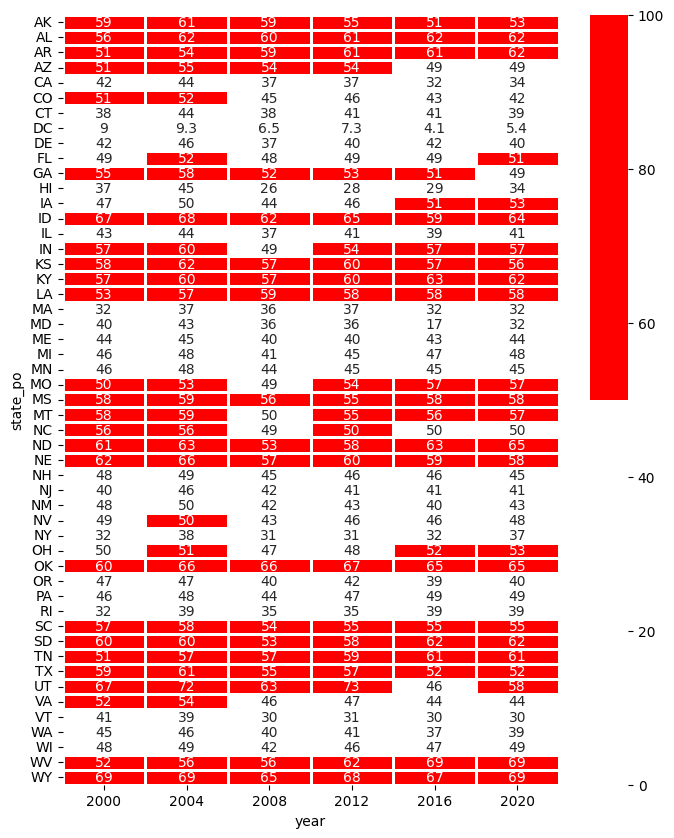

In [11]:
plt.figure(figsize=(8,10))

sns.heatmap(data=rep_year_score_df,linewidths=0.8,cmap=['white','red'],vmax=100,vmin=0,center=50, annot=True)

<Axes: xlabel='year', ylabel='state_po'>

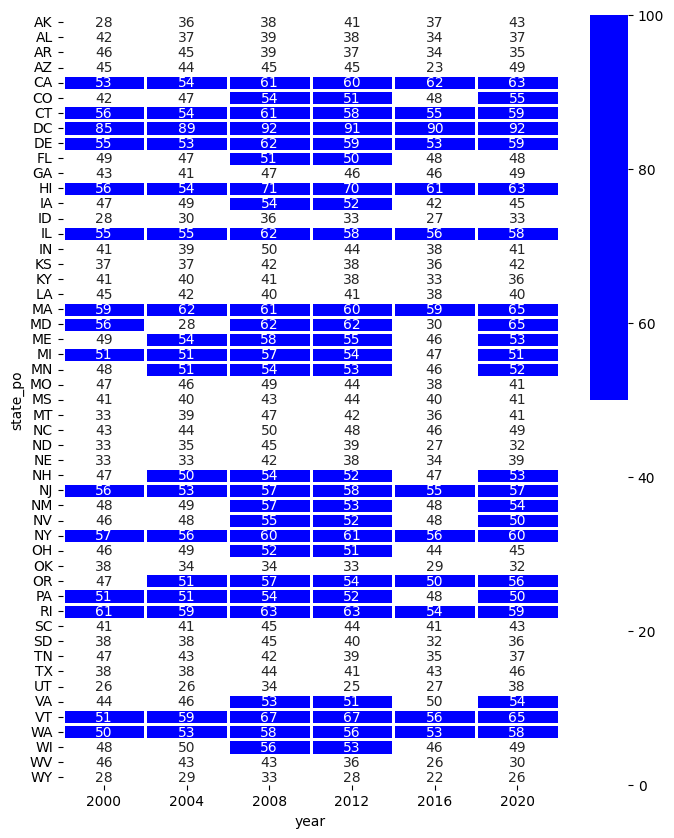

In [12]:
plt.figure(figsize=(8,10))

sns.heatmap(data=dem_year_score_df,linewidths=0.8,cmap=['white','blue'],vmax=100,vmin=0,center=50, annot=True)